# Assignment: Decision Tree

In this assignment, we will first learn how to train decision trees and we will use `sklearn` python package. It is recommended to use python 3.5 version or greater. Your `sklearn` version should be v0.21.3 or greater.  Some functions will not run in older versions.

We will use sklearn package in ipython jupyter notebook for this assignment. You are required to download and install `anaconda` package in order to run the notebook jupyter. After installing anaconda, open jupyter. This will open jupyter window in your browser. Upload `Data_Mining_Assignment.ipynb` to the jupyter (Click upload button-> select the file in your `Data_Mining_Assignment.ipynb` -> open -> then upload -> Double click the uploaded file)


In [14]:
## Decision Trees : sklearn

##Go to https://scikit-learn.org/stable/modules/tree.html. The page contains nice description of decision trees. The try to run the following code and modify the ipython notebook to answer few questions. You can insert markdown cells for answers, or code cells for programming. Run the cells one by one. Inspect the code. Write code and answers following the instructions.

In [15]:
# Import necessary Packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
!pip install --upgrade scikit-learn
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.3.1.


In [16]:
# Load iris data
iris = load_iris()

# check what are the features
print("Iris data Feature Names : ", iris.feature_names)

# print the detailed description 
print(iris.DESCR)

# load the data and target
X = iris.data
y = iris.target

Iris data Feature Names :  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    pe

**Question 1**. Study the code above. 
Write code to know how many classes are there in target y. 
Print the number of classes in the dataset in the cell. Print how many instances are there for each class. 
Print the number of total instances.

In [17]:
# write code here for question 1
Y = iris.target

# Count unique classes
unique_classes = np.unique(y)
num_classes = len(unique_classes)

print("Number of classes:", num_classes)

# Count instances for each class
for cls in unique_classes:
    count = np.sum(y == cls)
    print(f"Class {cls}: {count} instances")
    
# Total instances
total_instances = len(y)
print("Total instances:", total_instances)

Number of classes: 3
Class 0: 50 instances
Class 1: 50 instances
Class 2: 50 instances
Total instances: 150


The following code takes first two features and creates the decision boundary. Study the code, try to understand each line, run the code and answer the questions. You may modify the code (print a few lines) to understand it better.

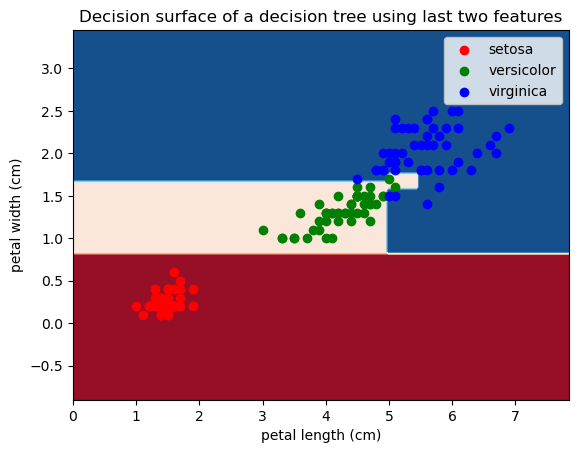

In [18]:
feature_pair = [-2, -1]
X = iris.data[:, feature_pair]

# instantiate the decision tree
clf = DecisionTreeClassifier()
clf.fit(X, y)

# Plot the decision boundary
plt.plot()





x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu)  # or any other colormap you prefer

plt.xlabel(iris.feature_names[feature_pair[0]])
plt.ylabel(iris.feature_names[feature_pair[1]])


# Define plot_colors
plot_colors = plt.cm.Paired(np.arange(num_classes))

plot_colors = ['red', 'green', 'blue']

# Plot the training points
for i, color in zip(range(num_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i])

plt.title("Decision surface of a decision tree using last two features")
plt.legend()
plt.show()


**Question 2**. Copy the above code below and modify it to train and display decision boundaries for the last two features.

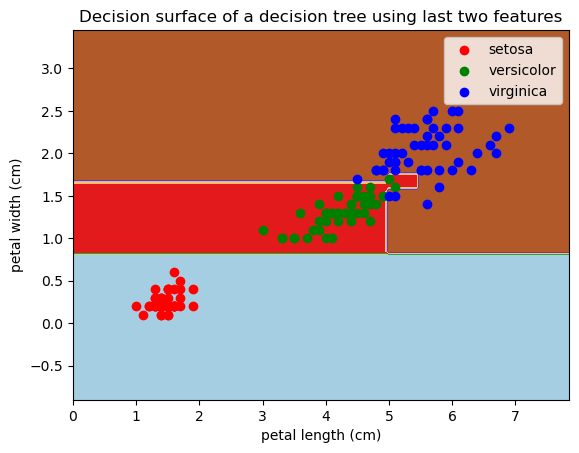

In [19]:
# Load the data and target
X = iris.data
y = iris.target

# Select the last two features
X = X[:, -2:]

# Instantiate the decision tree
clf = DecisionTreeClassifier()
clf.fit(X, y)

# Define the range for the plot
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Create a meshgrid to cover the range of the two features
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

# Predict the class for each point in the meshgrid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

# Label the axes
plt.xlabel(iris.feature_names[-2])
plt.ylabel(iris.feature_names[-1])

# Define the colors for each class
plot_colors = ['red', 'green', 'blue']

# Plot the training points
for i, color in zip(range(len(np.unique(y))), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i])

# Add a title and legend
plt.title("Decision surface of a decision tree using last two features")
plt.legend()
plt.show()


**Question 3**. Write code to train the decision tree using all 4 attributes.

In [20]:
# Import necessary packages
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Instantiate the decision tree classifier and fit it to the dataset
clf = DecisionTreeClassifier()
clf.fit(X, y)

# Predict the classes of the training set
y_pred = clf.predict(X)

# Calculate and print the accuracy
accuracy = accuracy_score(y, y_pred)
print(f"The accuracy of the decision tree on the training set is: {accuracy:.2f}")


The accuracy of the decision tree on the training set is: 1.00


## Printing Decision Trees 
Let us again train decision tree using the first two features and print it. Run the following code. Your `sklearn` version should be v0.21.3 or greater

The scikit-learn version is 1.3.1.


[Text(0.5, 0.75, 'x[0] <= 5.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.25, 0.25, 'gini = 0.237\nsamples = 52\nvalue = [45, 6, 1]'),
 Text(0.75, 0.25, 'gini = 0.546\nsamples = 98\nvalue = [5, 44, 49]')]

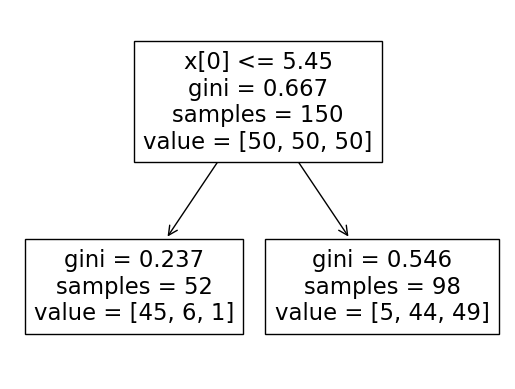

In [21]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

from sklearn import tree

iris = load_iris()

# Use only the first two features
feature_pair = [0,1]
X = iris.data[:, feature_pair]
y = iris.target

# Instantiate the decision tree classifier with max_depth=1
clf = DecisionTreeClassifier(max_depth=1)

# Fit the classifier and plot the tree
tree.plot_tree(clf.fit(X, y))


**Question 4**. (a) What does the max_depth parameter do? 
    Go to  https://scikit-learn.org/stable/modules/tree.html to study different algorithms :ID3, C4.5, C5.0 and CART
(b) Which algorithm is used in sklearn?     
(c) Which criterion is used to build the decision tree?

A.) Controls the max depth of the tree. Helps prevent the tree from overfitting. If the trees max depth is too low it can result in noise being captured in the dataset. B.) Classification and regression trees algorithm. C.) Measures thee quality of a split.

**Question 5** Modify the following code to change the following : maximum depth = 1 and `entropy` criterion.

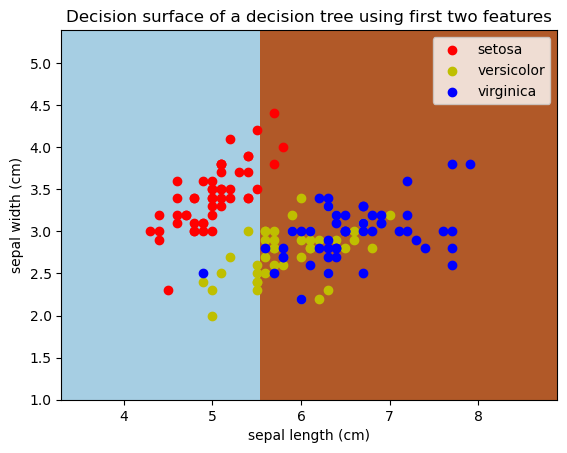

In [29]:
iris = load_iris()

X = iris.data
y = iris.target
n_classes = 3
plot_colors = "ryb"


feature_pair = [0,1]
X = iris.data[:, feature_pair]
y = iris.target

# instantiate the decision tree
clf = DecisionTreeClassifier(max_depth=1, criterion='entropy')
clf.fit(X, y)

# Plot the decision boundary
plt.plot()

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

plt.xlabel(iris.feature_names[feature_pair[0]])
plt.ylabel(iris.feature_names[feature_pair[1]])

# Plot the training points
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i])


plt.title("Decision surface of a decision tree using first two features")
plt.legend()
plt.show()

**Question 6** Write a code to print the decision tree using `all the four attributes` in the training set use :
 `max_depth` = 2 and `entropy` criterion 
 

[Text(0.4, 0.8333333333333334, 'x[3] <= 0.8\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.6, 0.5, 'x[3] <= 1.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.151\nsamples = 46\nvalue = [0, 1, 45]')]

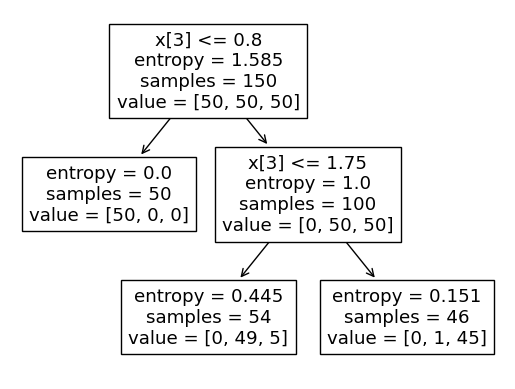

In [23]:
# Load the data and target
X = iris.data
y = iris.target

# Instantiate the decision tree with max_depth=2 and criterion=entropy
clf = DecisionTreeClassifier(max_depth=2, criterion='entropy')
clf.fit(X, y)

# Plot the decision tree
tree.plot_tree(clf)


## Train-Test Split
Study the code and understand what is being done.

In [24]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

predicted = clf.predict(X_train)

**Question 7**  Write a code to to print accuracy of the model.

In [25]:
# Calculate and print the accuracy on the test set
predicted_test = clf.predict(X_test)
accuracy_test = accuracy_score(y_test, predicted_test)
print(f"The accuracy of the decision tree on the test set is: {accuracy_test:.2f}")


The accuracy of the decision tree on the test set is: 0.98


## Finding the best Tree

**Question 8**. Perform a comparative study of a decision tree on Iris data using different parameters. Split the data into train and test. Experiment with `criterion` (default is `gini`, try to train using `entropy`), `max_depth` (try to set it to 2, 3, 4), `min_samples_leaf` (default is 1, try with 5, 15). Objective is to find a combination of parameters given below that improves accuracy on the test set. Report what you found. Print the decision boundaries, and the tree in each case.
You have to use the given structure to use different parameters (Read about List, dictionary and Tuple in python). Run the following code and try to understand how to iterate such data structure.

Criterion: gini, Max Depth: 1, Min Samples Leaf: 1, Accuracy: 0.68
Criterion: gini, Max Depth: 1, Min Samples Leaf: 5, Accuracy: 0.68
Criterion: gini, Max Depth: 1, Min Samples Leaf: 10, Accuracy: 0.68
Criterion: gini, Max Depth: 1, Min Samples Leaf: 15, Accuracy: 0.68
Criterion: gini, Max Depth: 2, Min Samples Leaf: 1, Accuracy: 0.98
Criterion: gini, Max Depth: 2, Min Samples Leaf: 5, Accuracy: 0.98
Criterion: gini, Max Depth: 2, Min Samples Leaf: 10, Accuracy: 0.98
Criterion: gini, Max Depth: 2, Min Samples Leaf: 15, Accuracy: 0.98
Criterion: gini, Max Depth: 3, Min Samples Leaf: 1, Accuracy: 0.98
Criterion: gini, Max Depth: 3, Min Samples Leaf: 5, Accuracy: 1.00
Criterion: gini, Max Depth: 3, Min Samples Leaf: 10, Accuracy: 0.98
Criterion: gini, Max Depth: 3, Min Samples Leaf: 15, Accuracy: 0.98
Criterion: gini, Max Depth: 4, Min Samples Leaf: 1, Accuracy: 0.98
Criterion: gini, Max Depth: 4, Min Samples Leaf: 5, Accuracy: 1.00
Criterion: gini, Max Depth: 4, Min Samples Leaf: 10, Acc

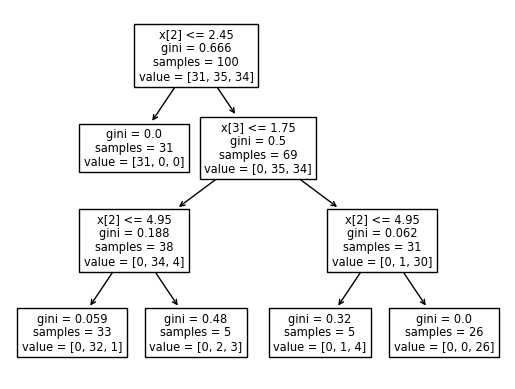

Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5}, Best Accuracy: 1.00


In [28]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree  # Import plot_tree here
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
# Load the dataset and split into training and testing sets
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Define the parameter grid
parameters = {
    'criterion': ('gini', 'entropy'),
    'max_depth': [1, 2, 3, 4, 5],
    'min_samples_leaf': [1, 5, 10, 15]
}

# Initialize the variables to store best parameters and accuracy
best_params = {}
best_accuracy = 0
best_clf = None  # variable to store the best classifier

# Iterate over all parameter combinations
for cr in parameters['criterion']:
    for d in parameters['max_depth']:
        for l in parameters['min_samples_leaf']:
            # Train the decision tree with the current parameter combination
            clf = DecisionTreeClassifier(criterion=cr, max_depth=d, min_samples_leaf=l)
            clf.fit(X_train, y_train)
            
            # Predict the classes for the test set
            y_pred = clf.predict(X_test)
            
            # Calculate the accuracy
            accuracy = accuracy_score(y_test, y_pred)
            
            # If the current accuracy is better than the best found, update the best parameters and accuracy
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {'criterion': cr, 'max_depth': d, 'min_samples_leaf': l}
                best_clf = clf  # update the best classifier
            
            # Output the parameter combination and corresponding accuracy
            print(f"Criterion: {cr}, Max Depth: {d}, Min Samples Leaf: {l}, Accuracy: {accuracy:.2f}")

# Output the best parameter combination and corresponding accuracy
print(f"Best Parameters: {best_params}, Best Accuracy: {best_accuracy:.2f}")

# Plot the decision tree with the best parameters
plot_tree(best_clf)
plt.show()

# Output the best parameter combination and corresponding accuracy
print(f"Best Parameters: {best_params}, Best Accuracy: {best_accuracy:.2f}")

In [27]:
# Experiments


This task is all about getting to know decision trees better. Think of decision trees as a type of model that makes decisions based on asking a series of questions. This exercise will help you see how changing different settings (or parameters) can make your decision tree work better or worse for a specific set of data.

You can adjust the settings of a decision tree to make it work best for different types of data. You'll also learn how to make pictures (or visualizations) of your decision trees, and how to measure (or evaluate) how well they're doing.

It's like a trial-and-error process: you try different settings, see how well they work, and then choose the best ones. Understanding how each setting affects your decision tree will help you make better choices and build better models.